# Predict App Enrollement based on User Data : Costumer Behavior

## Project Methodology :
#### From Problem to Approach : Asking the right questions

- Business Understanding:  What is the Business Objective ?
     * The objective is to **predict** whether a costumer will enroll to the app or not **based on their user data**
- Use Case :
    * We want to target the users who are less likely to enroll to make them enroll through campaigns .
    
- Understanding our ML Pipeline 
       * Input : User Data from app_data database 
       * output : Enrollment values ( 0 or 1)
- Framing the Problem :
     * The problem here is a typical **supervised learning task** since we have Labeled Training examples 
- Designing the System 
     * The Value of the output is 0 or 1 So the goal is **to predict a binary value** .
     * This is a **regression task** since we are asked to **PREDICT A VALUE**
     * It is a **Univariate Regression problem** since we Have **one single dependent value to predict** which is "Enrolled"
- Selecting a performance measure 
     * We are going to test the follwing : ROC Curve (AUC), classification Report and Confusion Matrix.


### A few Definitions 
* **Machine Learning Pipeline**  :
  A pipeline is a sequence of data processing components .
Components typically run **asynchronously** which means that Each component pulls in a large amount
of data, processes it, and spits out the result in another data storage. Then, some time later (not instantly), the next component in the pipeline pulls this data and spits out its own output .
* In the case of our project, the image below represents our ML Pipeline : 
<img src ="Pipeline.jpg" width ="500" Height="200" >
* **Logistic Regression** : (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class . If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.
* **Test Set** :  A test set is used to estimate the generalization error that a model will make on new instances, before the model is launched in production



**Information about the Dataset** :
* **user**: ID of the User
* **first_open**: The date of the first time the user opened the app
* **dayofweek**: The day of th week the user first opened the app 
* **hour**: the hour of the day the user first opened the app
* **age**: Age of the user 
* **screen_list**: the name of the screens of the app each user has seen.
* **numscreens**: the number of screens the user has seen
* **minigame**: whether or not the user played the minigame or not (Binary 0 or 1)
* **used_premium_feature**: whether or not the user used a premium feature (Binary 0 or 1)
* **enrolled**: whether or not the user enrolled or not (Binary 0 or 1)
* **enrolled_date**: the date of the enrollment
* **liked**: whether the user liked the app or not (0 or 1)


In [1]:
#Importing the necessary packages
import numpy as np
import pandas as pd

#### First we will load the Data : The file is of CSV format (Comma Separated Values) which is simple to load and process.

In [2]:
#Reading a file of type CSV named 'app_data'
Data =pd.read_csv('app_data.csv')

In [3]:
# shape returns the shape as a tuple of integers.
#notice here we have 50000 rows (user data) and 12 columns (features)
Data.shape

(50000, 12)

In [4]:
#The dataframe : Each row represents one user , and each column is a feature , 
Data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
# we set the index to be the userID
Data = Data.set_index('user')

In [6]:
Data

,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
user,,,,,,,,,,,
235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
...,...,...,...,...,...,...,...,...,...,...,...
222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0


#### For the next cell, the goal behind using Info() is :
  * 1- to view the types of the features (Columns)
  * 2- to verify whether there is missing data: 
     
      

* info() is a method(function) used to print a concise summary of a DataFrame
* 4 features are Categorical(first_open,hour,screen_list,enrolled_date)and are of type object(a pandas type) and the rest are numerical(int64)
* We notice that for "enrolled_date" , there are only 31074 Non-Null values , which means we will deal with it someway later on

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 235136 to 27047
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   first_open            50000 non-null  object
 1   dayofweek             50000 non-null  int64 
 2   hour                  50000 non-null  object
 3   age                   50000 non-null  int64 
 4   screen_list           50000 non-null  object
 5   numscreens            50000 non-null  int64 
 6   minigame              50000 non-null  int64 
 7   used_premium_feature  50000 non-null  int64 
 8   enrolled              50000 non-null  int64 
 9   enrolled_date         31074 non-null  object
 10  liked                 50000 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 4.6+ MB


#### We will now perform Summary Statistics also called descriptive statistics
* Summary statistics provides information about your sample data. 
* It includes **mean, median, mode, minimum value, maximum value, range, standard deviation, etc.**
* The std row shows the standard deviation, which measures how dispersed the values are.
* The 25%, 50%, and 75% rows show the corresponding percentiles: 
* a percentile indicates the value below which a given percentage of observations in a group of observations fall

In [8]:
#describe() method gives summary statistics for "NUMERICAL COLUMNS" in our DataFrame.
# We only need to perform it on Numerical Values only (Could be set to inlude Categorical Values)
Data.describe()

,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


* **A histogram** shows the number of instances(on the vertical axis) that have a given value range (on the horizontal axis).
* 

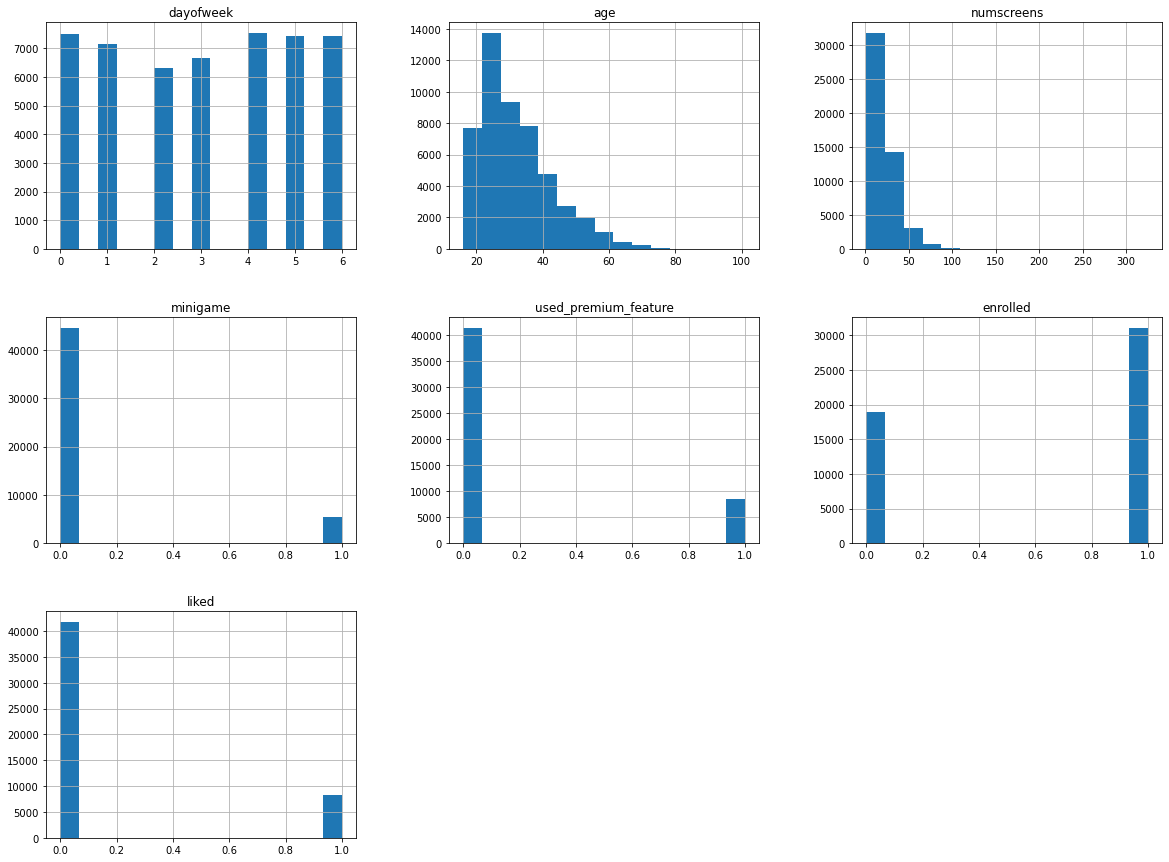

In [9]:
#We will print a histogram for each numerical Attribute 

import matplotlib.pyplot as plt
%matplotlib inline
Data[['dayofweek','age','numscreens','minigame','used_premium_feature','enrolled','liked']].hist(bins=15, figsize=(20,15))
plt.show()


**There are a few things we can notice in these Histograms** :
 * The day of the week distribution is uniform and the number of users in each day is almost the same except for the second and third day of the week (Work days).
 * for the Age and Number of screens ,we notice a large number of occurrences in the lower value cells 
     * Most of the users are of age between 20 and 40 
     * The number of viewed screens is between 0 and 20 while the maximum number of screens is 325
     * The most common age group is around 24-25 
 * Only a limited Number of users tried the mini game (less than 10000)
 * Only a limited number of people tried a premium feature (less than 10000)

### Feature Engineering the variables :
* **Independent Variables**
* our indepenendent variables 
* "screen_list" is a categorical variable: it contains a list of all the screens a user viewed.
     * We need to find a way to convert it to numerical :
         * The Idea is to convert each screen into a categorical variable in our main dataframe and use 0 or 1 to indicate whether a  user has viewed that screen or not
         
   

In [10]:
#we will get a set that contains all unique values in "screen_list"
screen_values=[]
for s in Data['screen_list'].values:
    for e in s.split(','):
        screen_values.append(e)
screen_values= set(screen_values)

In [11]:
screen_values

{'About',
 'AccountView',
 'AddProperty',
 'AddVehicle',
 'AdverseActions',
 'Alerts',
 'BVPlaidLinkContainer',
 'BVStats',
 'BankVerification',
 'BoostFriendsList',
 'CC1',
 'CC1Category',
 'CC3',
 'CameraScreen',
 'CommunityAndInvites',
 'ContactInfoConfirm',
 'Credit1',
 'Credit2',
 'Credit3',
 'Credit3Alerts',
 'Credit3CTA',
 'Credit3Container',
 'Credit3Dashboard',
 'Credits',
 'Cycle',
 'EditProfile',
 'EmploymentInfo',
 'EmploymentSummary',
 'Finances',
 'FindFriendsCycle',
 'ForgotPassword',
 'GroupedInstitutions',
 'History',
 'Home',
 'IdAndSelfieCameraScreen',
 'IdentityVerification',
 'InstantLoanSSN',
 'InstantOfferCreateAccount',
 'Institutions',
 'LLLoanAmount',
 'LandingScreen',
 'Leaderboard',
 'ListPicker',
 'Loan',
 'Loan1',
 'Loan2',
 'Loan3',
 'Loan4',
 'LoanAppAgreement',
 'LoanAppBankInfo',
 'LoanAppConfirmWithdrawal',
 'LoanAppDenied',
 'LoanAppESign',
 'LoanAppLoan4',
 'LoanAppPaymentSchedule',
 'LoanAppPromoCode',
 'LoanAppReasons',
 'LoanAppRequestAmount',
 '

In [12]:
#We will now choose the most relevant ones to convert them to columns :
#We can try predicting by choosing a different of screen values each time and check the results;
# Here ,we will choose all of them and drop none just to be more general .
for screen in screen_values :
    Data[screen] = Data.screen_list.str.contains(screen).astype(int)


In [13]:
Data

,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,IdentityVerification,joinscreen,VerifyBankInfo,product_review5,LoanAppPaymentSchedule,LoanAppAgreement,Rewardjoinscreen,TransactionList,product_review,ProfileMaritalStatus
user,,,,,,,,,,,,,,,,,,,,,
235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,...,0,1,0,0,0,0,0,0,1,0
333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,...,0,1,0,0,0,0,0,0,1,0
254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,...,0,0,0,0,0,0,0,0,0,0
234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,0,1,0
51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,...,0,0,0,0,0,0,0,0,1,0
169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,...,0,0,0,0,0,0,0,0,0,0
302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,...,0,1,0,0,0,0,0,0,1,0


In [14]:
#we will now drop the column screen_list because we don't need it anymore
Data.drop(columns=['screen_list','hour'], inplace=True)

##### Remark :
    * We will drop enrolled date bcz it's highly related to enrolled (They can be considered the same),
    * we do not have an enrolled date if there is no enrollment .
    * we will drop "first_open" because it's not quite relevant in our study since we don't require a date to predict .

In [15]:
Data.drop(columns=['first_open','enrolled_date'],inplace=True)

 **About Correlations**
   * Data Correlation: Is a way to understand the relationship between multiple variables and attributes in your dataset. 
   * Using Correlation, you can get some insights such as:
        * One or multiple attributes depend on another attribute or a cause for another attribute.
        * One or multiple attributes are associated with other attributes.
   * correlation types can exist in a spectrum represented by values from 0 to 1 where slightly or highly positive correlation features can be something like 0.5 or 0.7.
   
 **why is correlation useful?**
   * Correlation can help in predicting one attribute from another (Great way to impute missing values).
   * Correlation can (sometimes) indicate the presence of a causal relationship.
   * Correlation is used as a basic quantity for many modelling techniques
   
 **Positive Correlation:**
 * means that if feature A increases then feature B also increases or if feature A decreases then feature B also decreases. Both features move in tandem and they have a linear relationship.
 
 **Negative Correlation**
 * means that if feature A increases then feature B decreases and vice versa.
 
 **No Correlation:**
 * No relationship between those two attributes.
 
 **What happens if there is no correlation between two variables (Correlation coeef =0 ?**
    * If there is no correlation between two variables, it means that the variables do not appear to be statistically related, that the value of one variable doesn't increase or decrease in association with the increase or decrease of the other variable.
    
  

In [16]:
# we will set the display of the dataframe to show all rows and all columns to view the correlations better.
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
# we create a correlation Matrix 
corr_matrix = Data.corr()
corr_matrix

,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked,ForgotPassword,Credit3CTA,InstantOfferCreateAccount,RewardsContainer,Loan4,EmploymentSummary,LoanAppPromoCode,AddProperty,Finances,Splash,Credit3Container,LandingScreen,Saving6,EmploymentInfo,BVStats,SignupEmail,About,Loan2,product_review3,AddVehicle,Institutions,LoanAppESign,NetworkFailure,GroupedInstitutions,Saving7,VerifyPhone,product_review4,ProfileEducationMajor,Saving4,Saving8,LoanAppConfirmWithdrawal,AccountView,Credit3Alerts,SavingGoalPreview,ResendToken,Credits,Credit3Dashboard,Leaderboard,ProfileCompanyName,VerifyDateOfBirth,Credit2,ScanPreview,VerifyAnnualIncome,Payoff,product_review2,BoostFriendsList,Rewards,Saving2Amount,Loan3,SecurityModal,LoanAppLoan4,NewContactListInvite,CommunityAndInvites,BVPlaidLinkContainer,LoanAppWithdrawn,MLWebView,VerifyIncomeType,VerifyMobile,CC1,ProfileAnnualIncome,Profileproduct_review,LoanAppScheduleCall,LoanAppDenied,Alerts,CC1Category,Cycle,ProfileEmploymentLength,YourNetwork,WebView,BankVerification,Saving1,Saving2,VerifyToken,Saving9,VerifySSN,SignupName,AdverseActions,ProfilePage,ProfileVerifyIncomeType,Signup,ContactInfoConfirm,Settings,Credit3,ReferralContainer,VerifyHousingAmount,LoanAppBankInfo,Home,Loan,ProfileJobTitle,ProfileVerifySSN,LLLoanAmount,ProfileEducation,RewardDetail,location,VerifyHousing,CC3,SavingGoalEdit,ReviewCreditCard,FindFriendsCycle,VerifyCountry,ProfileChildren,WelcomeBankVerification,InstantLoanSSN,LoanAppSuccess,ManageFinances,History,CameraScreen,ProviderList,LoanAppVerifyBankInfo,EditProfile,Saving5,Referrals,IdAndSelfieCameraScreen,ReferralScreen,SavingGoalOther,SavingGoalIncomeSalary,LoanAppReasons,LoginForm,idscreen,LoanAppRequestAmount,SelectInstitution,NetworkUser,Credit1,ListPicker,Login,Loan1,Saving10,IdentityVerification,joinscreen,VerifyBankInfo,product_review5,LoanAppPaymentSchedule,LoanAppAgreement,Rewardjoinscreen,TransactionList,product_review,ProfileMaritalStatus
dayofweek,1.000000,-0.012326,0.007925,-0.008631,0.001439,0.011326,-0.005737,0.005834,0.002135,-0.004743,-0.007147,0.000924,-0.004816,0.002559,-0.003433,-0.000121,-0.000559,0.008220,-0.001101,0.006213,-0.004855,-0.007062,-0.001652,0.002775,0.006476,-0.004021,0.001938,0.008830,0.003129,0.002484,-0.003641,0.008011,0.008687,0.008622,-0.001255,0.010098,-0.004298,-0.000863,-0.010542,-0.000984,0.004950,-0.005913,0.003361,0.004872,-0.003291,0.003142,0.005561,0.003066,0.014768,0.003100,-0.005443,0.008205,-0.005455,-0.008702,0.002908,0.001102,-0.002347,0.002135,-0.003688,0.002341,-0.000491,-0.004654,-0.008858,-0.001427,-0.005643,0.006807,-0.001477,0.005363,0.002270,-0.004243,0.000789,0.000269,-0.004636,0.000849,-0.000815,-0.008870,0.002215,0.008058,-0.000040,0.004566,0.002289,0.000144,0.005269,0.002205,0.000757,-0.002532,0.003817,-0.001872,0.003969,0.004477,0.001779,-0.000634,-0.007221,0.004285,0.007838,0.001891,-0.003454,-0.003526,-0.000800,-0.001829,0.003073,0.000602,-0.003725,0.001951,0.007426,0.000494,0.003730,0.000708,-0.003774,-0.003206,-0.002437,-0.002199,0.001653,-0.000887,0.006136,0.002806,0.003095,0.006081,-0.001128,-0.006668,0.006788,0.004159,-0.002399,0.005654,-0.000343,0.007608,0.005461,-0.000748,-0.006318,0.005446,-0.002306,-0.000723,0.001585,0.008911,-0.003206,0.008019,-0.004810,0.006443,0.006359,0.005369,-0.001127,0.002225,0.007984,-0.000925
age,-0.012326,1.000000,-0.128739,0.019745,0.004301,-0.131303,-0.002593,-0.007956,0.001770,0.002589,-0.031871,-0.012898,0.022281,0.024046,-0.003084,-0.047324,0.009280,-0.039315,0.001961,-0.025772,0.015545,0.012815,-0.006511,0.004522,-0.024932,-0.132051,0.000871,-0.040819,0.030227,0.014945,0.011604,0.002309,-0.139735,0.036978,-0.017485,-0.014739,-0.001805,0.008044,0.001198,0.011265,-0.008919,-0.026451,0.012437,0.012961,0.003116,-0.013757,-0.118871,-0.061467,-0.135245,0.007015,0.019002,-0.037443,0.006019,-0.035648,0.020483,-0.057289,0.024346,0.000114,-0.016448,-0.008433,-0.019426,0.003998,0.032969,-0.001650,-0.015096,-0.027739,0.000857,-0.001595,0.024268,0.002447,0.0

In [ ]:
# we will visualize the correlation matrix using Seaborn Heatmap
import seaborn as sns
plt.figure(figsize=(100, 100))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# we want to view the correlations with the column enrolled 
enrolled_cor = corr_matrix['enrolled'].sort_values(ascending=False)
enrolled_cor

* **Interpreting Correlation :** 
* We can see the most correlated features with enrolled 
* we notice that verifying social security number and phone are the first factors for enrollment .
* The person who is more likely to verify ssn and phone number is more likely to enroll 
* Most of the other features have a very close to 0 coeff which means there is almost no correlation ata all

**We will now separate our training data (the features) from the Y label which is the predicted label "enrolled"**

In [ ]:
# enrolled_label is the target label we want to predict
enrolled_label = Data['enrolled']
# we will drop the enrolled column from our Data and create a new dataframe without it 
Dataset = Data.drop(columns='enrolled')

**Create a test Set** <br>

In [ ]:
from sklearn.model_selection import train_test_split
# we will split our data to training and testing using 20% of the samples for test and 80% for training
train_set, test_set,y_train,y_test = train_test_split(Dataset,enrolled_label, test_size=0.2, random_state=42)

**Feature Scaling** <br>
* We will be scaling out the data
* **Standardization** : subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance.



In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler =StandardScaler()
# we will fit the scaler to the training data only .
# we will also transform the training data (fit() + transform() = fit_transform)
x_train = Scaler.fit_transform(train_set)
#we will use it to transform the test data
x_test = Scaler.transform(test_set)
x_train
x_test

* **Remark** :
* We fit our Scaler to the **training data** and then transformed it .
* but we only used the scaler that was already fit on the **training set** to transform the **test set**

#### Training the Model
* Since it is a regression task in which we predict a binary value , we choose Logistic Regression .
* Logistic regression is a binary classification method.
* It can be modelled as a function that can take in any number of inputs and constrain the output to be between 0 and 1

In [ ]:
# we are now going to train the model:
from sklearn.linear_model import LogisticRegression
# We create an instance of LR model specifiying our parameters (here we only have random state)
# why 42 : just a random number that helps to reproduce the same result after reuse the train_test_split.
enrollment_classifier = LogisticRegression(random_state = 42)
# we fit the model to our data
enrollment_classifier.fit(x_train, y_train)

In [ ]:
# we compute our predictions on the test set
enrolled_y_pred = enrollment_classifier.predict(x_test)
enrolled_y_pred

### Interpreting Logistic regression outputs :
* **1.Confusion Matrix**
* **2.Precision and Recall**
* **3.ROC AUC Curves**


**1.Confusion Matrix**
* A confusion matrix,(error matrix) is a summarized table used to assess the performance of a classification model.
* The number of correct and incorrect predictions are summarized with count values and broken down by each class.
* In a confusion Matrix The rows (along the Y axis) represent the actual Values and the columns(along the x axis) the Predicted values

In [ ]:
from sklearn.metrics import confusion_matrix
# we calculate a confusion matrix
#To compute the confusion matrix,we need to have a set of predictions so that they can be compared to the actual targets.
cm = confusion_matrix(y_test, enrolled_y_pred)

In [ ]:
# we plot our confusion matrix
plt.figure(figsize=(10, 10))
plt.title('Enrollment Confusion Matrix', fontdict={'fontsize':14}, pad=12)
sns.heatmap(cm,cbar_kws={'label': 'Counts'},annot=True )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Interpreting confusion Matrix :
* **Rows** : Actual Labels 
* **Columns** : Predicted Labels 
* **True Negative**: 3400 users did not enroll(y_test=0)  and were correctly predicted as not enrolled (enrolled_pred=0)
* **False Negative**: 1100 users actually enrolled (y_test=1) and were uncorrectly predicted as not enrolled (enrolled_pred=0)
* **False Positive**: 480 users didn't enroll (y_test=0) were predicted uncorrectly as enrolled (enrolled_pred=1)
* **True Positive** : 5100 users were actually enrolled (y_test=1) and were predicted correctly as enrolled(enrolled_pred=1) 

**2.Precision and Recall**

* Our goal is to predict whether a user will enroll or not ;
* The precision is the ratio of correctly predicted enrolled by the total positively predicted enrolled
* The recall is the ratio of correctly predicted enrolled by the total number of enrolled. <br>
    * **Precision** = TP / TP + FP
    * **Recall** = TP / TP + FN
* The F1 score is the harmonic mean of precision and recall
    

In [ ]:
from sklearn.metrics import precision_score , recall_score,f1_score

print("precision score",precision_score(y_test,enrolled_y_pred))
print("recall score",recall_score(y_test,enrolled_y_pred))
print("f1 score",f1_score(y_test,enrolled_y_pred))


**3.ROC AUC Curves**
* **ROC** is a probability curve and **AUC** represents the degree or measure of separability.
* It tells how much the model is capable of distinguishing between classes. 
* Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. 
* By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

    

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, enrolled_y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

   *  We notice here that our AUC=0.85 which is pretty close to 1.
   * this means : It has a good measure of separability between classes, the model is able to predict the classes correctly up to 85% accuracy
   * The measure of Separability in this case is 0.85 which means that our model has an 85 % probability of predicting the class 0 as 0 and the class 1 as 1

In [ ]:
print(list(y_test[:10]),'\n',list(enrolled_y_pred[:10]))

In [ ]:
# we Get the predicited probability of testing data
np.set_printoptions(suppress=True)
y_scores_10 = enrollment_classifier.predict_proba(x_test[:10])
y_scores_10

* Looking at the first 10 instances , 8 of them were predicted correctly and 2 were predicted Incorrectly ;
when we predicted the probability of each instance being predicted as 0 or 1 we observed that:
    * The 1st element : 
        * Actual label= 1, Predicted label = 0 since the probability of getting 0 was equal to 0.68 while the probability of getting 1 was only 0.31 
    * The last element : 
         * Actual label= 0, Predicted label = 1 since the probability of getting 0 was equal to 0.40 while the probability of getting 1 was higher 0.59.     
    * The elements 2 to 9 were Predicted correctly with a high probability.

In [ ]:
from sklearn.metrics import average_precision_score
# we will do it again for all elements 
y_scores= enrollment_classifier.predict_proba(x_test)
y_scores

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(enrollment_classifier, x_test, y_test)
disp.ax_.set_title('Binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

* We plot precision vs recall to check the tradeoff parameters :
* In our project which predicts enrollment or not;
we have 2 cases :
    
    * We care about the users who are less likely to enroll because we want t
    * Why do we care whether a user enrolled or not ?
    
        *  users who are likely to enroll:
        * users who are not likely to unroll :
* We can see that precision starts to fall down at 0.7 recall 
* You will probably want to select a precision/recall trade-off just before that drop

### Finally, we will save our final model

In [ ]:
import joblib 
#this will create a file containing te model
# the file is found in the same directory where the notebook is .
joblib.dump(enrollment_classifier ,"enrollment_classifier.pkl")
#we will be able to load our saved model using :
# my_model = joblib.load("enrollment_classifier.pkl")